In [78]:
import os
import torch
from torch import nn
from torch.utils.data import dataloader 
from torchvision import datasets, transforms
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [79]:
device=("cuda"
       if torch.cuda.is_available()
       else "mps"
       if torch.backends.mps.is_available()
       else "cpu")

print(f"Using {device} device")

Using cpu device


In [82]:
df = pd.read_csv('cancer_classification.csv')

In [98]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [100]:
df.shape

(569, 31)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [84]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'benign_0__mal_1'],
      dtype='object')

<Axes: xlabel='benign_0__mal_1', ylabel='count'>

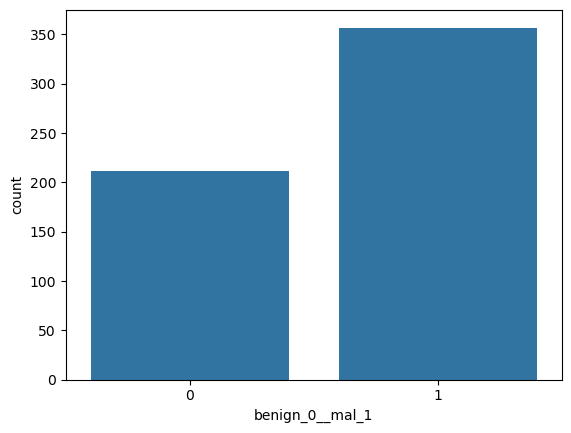

In [85]:
sns.countplot(x= 'benign_0__mal_1' , data= df)

In [86]:
df.corr()['benign_0__mal_1'][:-1].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<Axes: >

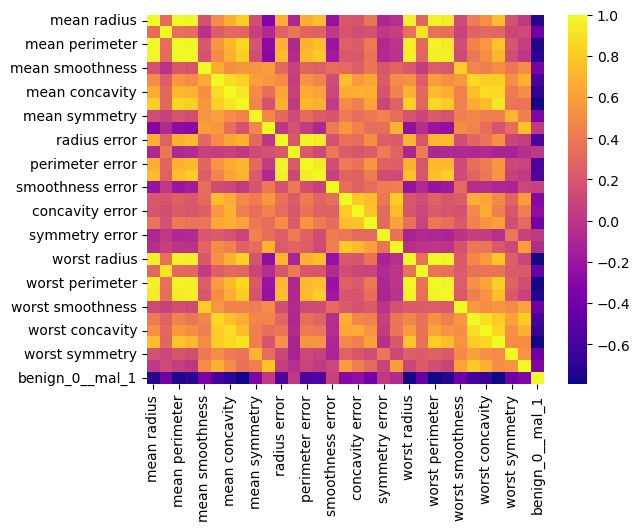

In [111]:
sns.heatmap(df.corr(), cmap='plasma')

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [89]:
x_train ,x_test, y_train ,y_test=train_test_split(X,y, test_size=0.25,random_state=101 )

In [90]:
from sklearn.preprocessing import MinMaxScaler

In [91]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [92]:
X_train_tensor = torch.tensor(x_train, dtype=torch.float32, device=device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32, device=device).view(-1, 1)  # Redimensionner pour correspondre à la forme attendue de la sortie du modèle

X_test_tensor = torch.tensor(x_test, dtype=torch.float32,device=device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32, device=device).view(-1, 1)  # Redimensionner pour correspondre à la forme attendue de la sortie du modèle


In [93]:
class CancerClassifier(nn.Module):
    def __init__(self):
        super(CancerClassifier, self).__init__()
        self.fc1 = nn.Linear(x_train.shape[1], 30)
        self.fc2 = nn.Linear(30, 15)
        self.fc3 = nn.Linear(15, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x


In [94]:
model = CancerClassifier()



1. **Binary Cross-Entropy Loss (BCELoss)** :
   - La perte de binary cross-entropy est largement utilisée pour les tâches de classification binaire.
   - Elle mesure la différence entre les distributions de probabilité réelle et prédite.
   - Pour chaque exemple, la perte est calculée comme la somme des erreurs de classification pour chaque classe. Pour une classification binaire, il n'y a que deux classes, donc une seule valeur est calculée.
  
2. **Adam Optimizer** :
   - Adam est un optimiseur populaire utilisé pour entraîner des réseaux de neurones profonds.
   - Il est basé sur la méthode de descente de gradient stochastique, mais il adapte le taux d'apprentissage pour chaque paramètre individuel.
   - Adam maintient des moyennes mobiles de premier et deuxième ordre des gradients pour chaque paramètre. Il utilise ces moyennes pour ajuster le taux d'apprentissage pendant l'entraînement.
   - Cela permet à Adam de converger plus rapidement et de mieux gérer les problèmes de régularisation et d'initialisation.



In [158]:
criterion = nn.BCELoss()  # Utilise la perte binary cross-entropy pour la classification binaire
optimizer = torch.optim.Adam(model.parameters())  # Utilise l'optimiseur Adam


Model training

In [159]:
epochs = 600
train_losses = []
test_losses = []
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    #Effectue la rétropropagation pour calculer les gradients de la perte par rapport aux paramètres du modèle.
    loss.backward()
    optimizer.step()
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor)
    train_losses.append(loss.item())
    test_losses.append(test_loss.item())

    print(f'Epoch [{epoch+1}/{epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {test_loss.item():.4f}')
    

Epoch [1/600], Training Loss: 0.6716, Validation Loss: 0.6730
Epoch [2/600], Training Loss: 0.6699, Validation Loss: 0.6715
Epoch [3/600], Training Loss: 0.6683, Validation Loss: 0.6701
Epoch [4/600], Training Loss: 0.6666, Validation Loss: 0.6686
Epoch [5/600], Training Loss: 0.6650, Validation Loss: 0.6671
Epoch [6/600], Training Loss: 0.6633, Validation Loss: 0.6655
Epoch [7/600], Training Loss: 0.6616, Validation Loss: 0.6639
Epoch [8/600], Training Loss: 0.6599, Validation Loss: 0.6623
Epoch [9/600], Training Loss: 0.6581, Validation Loss: 0.6606
Epoch [10/600], Training Loss: 0.6563, Validation Loss: 0.6587
Epoch [11/600], Training Loss: 0.6543, Validation Loss: 0.6568
Epoch [12/600], Training Loss: 0.6523, Validation Loss: 0.6547
Epoch [13/600], Training Loss: 0.6501, Validation Loss: 0.6525
Epoch [14/600], Training Loss: 0.6478, Validation Loss: 0.6501
Epoch [15/600], Training Loss: 0.6454, Validation Loss: 0.6476
Epoch [16/600], Training Loss: 0.6428, Validation Loss: 0.6450
E

Text(0, 0.5, 'Loss')

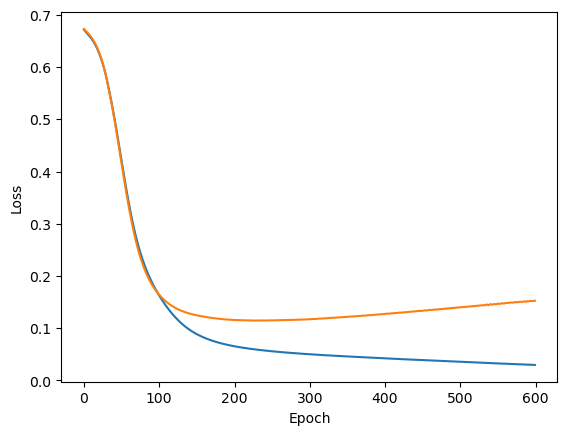

In [160]:
plt.plot(train_losses, label='training loss')
plt.plot(test_losses,label='testing loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [112]:
for param_tensor in model.state_dict():
    print(param_tensor, "\n", model.state_dict()[param_tensor].numpy())

fc1.weight 
 [[ 4.20195423e-03  1.31773859e-01 -1.55359924e-01  2.77175695e-01
  -1.15212433e-01  8.00858289e-02  3.27642679e-01  2.34348744e-01
   1.18031554e-01 -3.47097725e-01  5.00652671e-01  1.51305888e-02
   3.85904163e-01  3.79503936e-01  8.63310769e-02 -1.26943111e-01
  -2.91287839e-01 -1.40962496e-01  7.68436939e-02 -1.24158122e-01
   1.37044340e-01  3.12035650e-01  2.46348567e-02  2.16082111e-01
   2.25038484e-01  9.01666209e-02  2.82896757e-01  3.23755980e-01
   2.28663996e-01  4.00638849e-01]
 [-1.08159661e-01 -8.26280266e-02 -1.70661345e-01 -1.60406068e-01
   1.47192776e-02 -6.20027706e-02 -9.27401334e-02  1.68741971e-01
  -1.54301003e-01 -5.71892858e-02  3.37446183e-02 -9.14303437e-02
   6.73322976e-02 -1.88893527e-02  1.87806040e-02  1.81855112e-01
   1.67858452e-01 -6.09539226e-02 -4.67568934e-02 -1.31512523e-01
  -1.09503865e-02  1.42187595e-01  1.22434437e-01  8.48557651e-02
   8.08732212e-02 -8.34346414e-02 -1.58199012e-01 -1.40307605e-01
   9.11614299e-03  8.0706208

In [120]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    y_pred = (y_pred > 0.5).float()

In [122]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test_tensor.cpu().numpy(), y_pred.cpu().numpy())
conf_matrix

array([[53,  2],
       [ 7, 81]], dtype=int64)

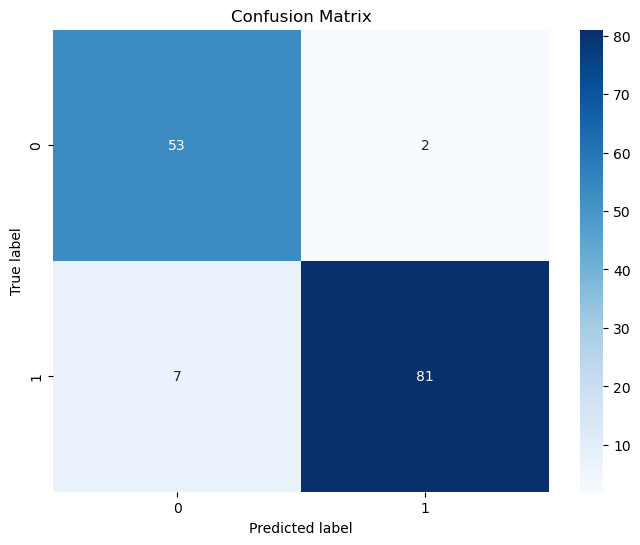

In [123]:

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()